In [22]:
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [53]:
data = pd.read_csv('..\salmon_price_prediction\salmon_prices.csv', sep=';', skiprows=1)[['uke', 'Vekt (tonn)', 'Kilopris (kr)']]

# Change index to datetime format
date_series = pd.to_datetime(data['uke'].str[:4] + data['uke'].str[-2:] + '1', format='%Y%W%w')
data['ds'] = date_series
data.drop('uke', axis=1, inplace=True)

price_data = data[['ds', 'Kilopris (kr)']].rename(columns={'Kilopris (kr)':'y'})
export_data = data[['ds', 'Vekt (tonn)']].rename(columns={'Vekt (tonn)':'y'})


In [77]:

price_train, price_test = train_test_split(price_data, test_size=0.25, shuffle=False)
export_train, export_test = train_test_split(export_data, test_size=0.25, shuffle=False)

price_model = Prophet()
price_model.fit(price_train)

export_model = Prophet()
export_model.fit(export_train)

price_forecast = price_model.predict(price_test)
export_forecast = export_model.predict(export_test)


14:08:33 - cmdstanpy - INFO - Chain [1] start processing
14:08:33 - cmdstanpy - INFO - Chain [1] done processing
14:08:33 - cmdstanpy - INFO - Chain [1] start processing
14:08:33 - cmdstanpy - INFO - Chain [1] done processing


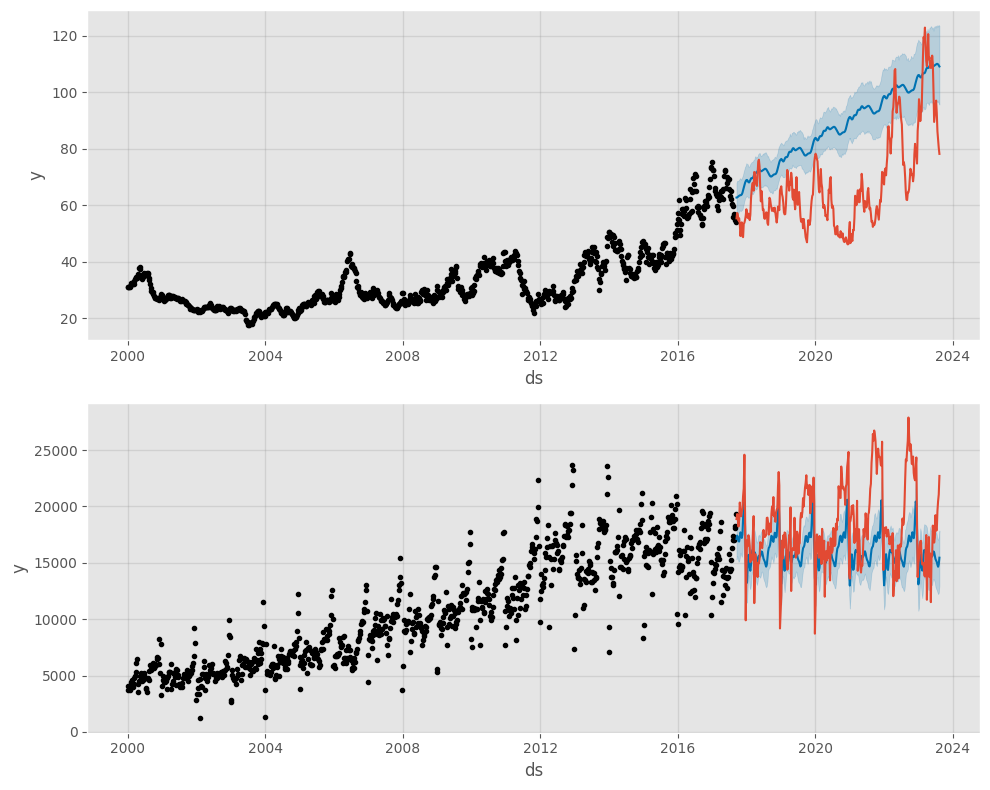

In [78]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
price_model.plot(price_forecast, ax=ax1)
ax1.plot(price_test['ds'], price_test['y'])

export_model.plot(export_forecast, ax=ax2)
ax2.plot(export_test['ds'], export_test['y'])


# price_model.plot_components(price_forecast)
# export_model.plot_components(export_forecast)

14:13:28 - cmdstanpy - INFO - Chain [1] start processing
14:13:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,30.001644,21.151438,41.193943,30.001644,30.001644,1.116659,1.116659,1.116659,1.116659,1.116659,1.116659,0.0,0.0,0.0,31.118302
1,2000-01-10,29.960913,22.100237,40.902801,29.960913,29.960913,1.298424,1.298424,1.298424,1.298424,1.298424,1.298424,0.0,0.0,0.0,31.259337
2,2000-01-17,29.920183,21.325139,41.324748,29.920183,29.920183,0.882936,0.882936,0.882936,0.882936,0.882936,0.882936,0.0,0.0,0.0,30.803119
3,2000-01-24,29.879453,20.143653,39.262469,29.879453,29.879453,0.167867,0.167867,0.167867,0.167867,0.167867,0.167867,0.0,0.0,0.0,30.047320
4,2000-01-31,29.838722,19.620340,39.425976,29.838722,29.838722,-0.242913,-0.242913,-0.242913,-0.242913,-0.242913,-0.242913,0.0,0.0,0.0,29.595809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,2028-08-08,112.938677,99.574128,122.771112,105.607889,119.744934,-1.803684,-1.803684,-1.803684,-1.803684,-1.803684,-1.803684,0.0,0.0,0.0,111.134993
3050,2028-08-09,112.954265,97.888282,123.211770,105.608374,119.768477,-1.915557,-1.915557,-1.915557,-1.915557,-1.915557,-1.915557,0.0,0.0,0.0,111.038708
3051,2028-08-10,112.969853,98.931022,122.508299,105.615609,119.792020,-2.021789,-2.021789,-2.021789,-2.021789,-2.021789,-2.021789,0.0,0.0,0.0,110.948064
3052,2028-08-11,112.985441,98.820160,122.627730,105.624652,119.812337,-2.122192,-2.122192,-2.122192,-2.122192,-2.122192,-2.122192,0.0,0.0,0.0,110.863249


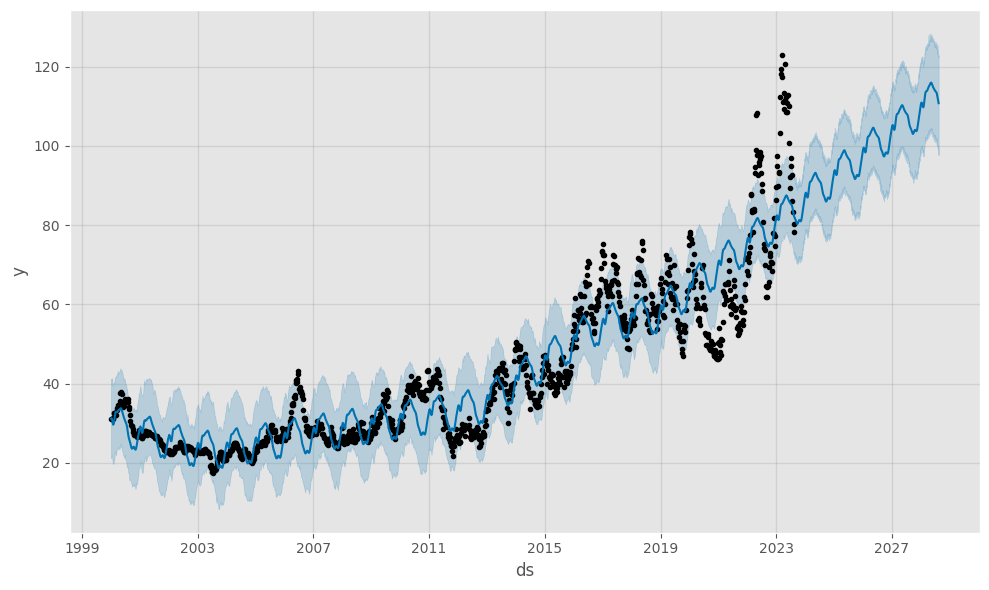

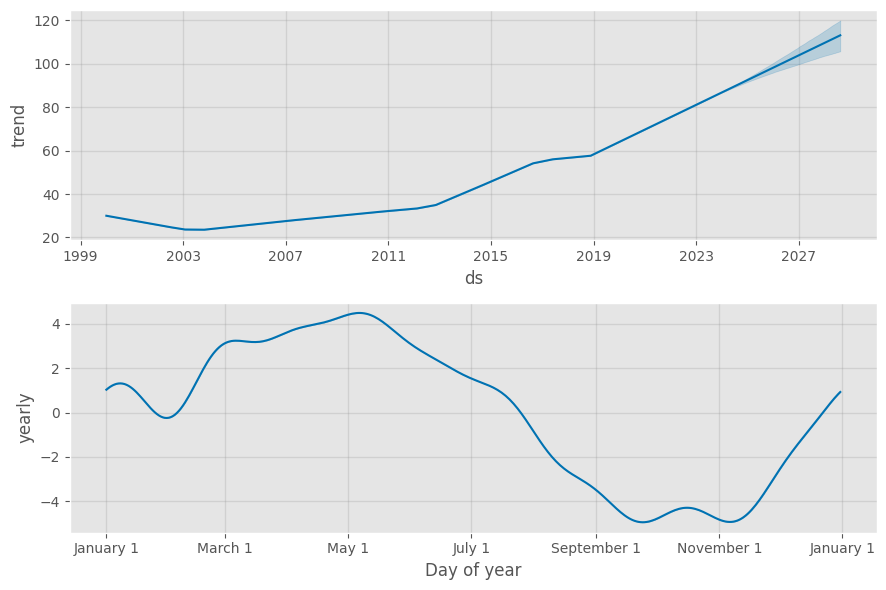

In [92]:

price_model = Prophet()
price_model.fit(price_data)
price_future = price_model.make_future_dataframe(periods=365*5)
price_forecast = price_model.predict(price_future)
fig = price_model.plot(price_forecast)

fig2 = price_model.plot_components(price_forecast)

price_forecast